In [2]:
import numpy as np

import os

os.environ['CUDA_VISIBLE_DEVICES'] = '1'
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'


In [59]:
data = np.load('dataset/seq_what_1716722114.npy')

new_label = 5.00000000e+00  # 새로운 라벨 값으로 변경
data[:, :, -1] = new_label

np.save('dataset/seq_what_1716722114.npy', data)


In [3]:
data = np.load('dataset/seq_nice_1716725603.npy')
data

array([[ 1.54358938e-01,  9.03195381e-01,  4.10207441e-08, ...,
         1.20741827e-06,  0.00000000e+00,  1.20741827e-06],
       [ 1.73739970e-01,  8.48457575e-01,  1.60192428e-07, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.95233285e-01,  7.89771259e-01,  2.91040578e-07, ...,
         1.20741827e-06,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 1.43567309e-01,  5.37320316e-01, -2.81775471e-07, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.46590084e-01,  5.26789427e-01, -2.68394018e-07, ...,
         0.00000000e+00,  0.00000000e+00,  8.53773646e-07],
       [ 1.51645213e-01,  5.10322988e-01, -3.30471721e-07, ...,
         8.53773646e-07,  1.20741827e-06,  0.00000000e+00]])

In [14]:
# 새로운 데이터를 불러옵니다.
new_data = np.load('dataset/seq_what_1716725603.npy')

# 기존 데이터에 새로운 데이터를 추가합니다.
existing_data = np.load('dataset/seq_what_1716722114.npy')

data = np.concatenate([existing_data, new_data], axis=0)
np.save('dataset/seq_what_1716725603.npy', data)


In [15]:
actions = [
    'meet', 'nice', 'hello'
]

data = np.concatenate([
    # np.load('dataset/seq_meet_1716721221.npy'),
    # np.load('dataset/seq_nice_1716721221.npy'),
    # np.load('dataset/seq_hello_1716721221.npy'),
    # np.load('dataset/seq_you_1716722114.npy'),
    # np.load('dataset/seq_name_1716722114.npy'),
    # np.load('dataset/seq_what_1716722114.npy')

    np.load('dataset/seq_meet_1716732929.npy'),
    np.load('dataset/seq_nice_1716732929.npy'),
    np.load('dataset/seq_hello_1716732929.npy'),
    # np.load('dataset/seq_you_1716725603.npy'),
    # np.load('dataset/seq_name_1716725603.npy'),
    # np.load('dataset/seq_what_1716725603.npy')
    
], axis=0) 

data.shape


(2535, 30, 66)

In [16]:
print(data)

[[[ 8.29660118e-01  9.58266258e-01 -3.00974932e-07 ...  0.00000000e+00
    0.00000000e+00  0.00000000e+00]
  [ 7.83299923e-01  9.87833619e-01 -2.57316373e-07 ...  0.00000000e+00
    0.00000000e+00  0.00000000e+00]
  [ 7.46789038e-01  9.83990192e-01 -1.95882336e-07 ...  0.00000000e+00
    0.00000000e+00  0.00000000e+00]
  ...
  [ 7.05835342e-01  8.81330013e-01 -6.17969178e-08 ...  0.00000000e+00
    0.00000000e+00  0.00000000e+00]
  [ 6.65639937e-01  8.82690191e-01 -6.52410037e-08 ...  0.00000000e+00
    0.00000000e+00  0.00000000e+00]
  [ 6.35008454e-01  8.79838943e-01 -7.78674405e-08 ...  0.00000000e+00
    0.00000000e+00  0.00000000e+00]]

 [[ 7.83299923e-01  9.87833619e-01 -2.57316373e-07 ...  0.00000000e+00
    0.00000000e+00  0.00000000e+00]
  [ 7.46789038e-01  9.83990192e-01 -1.95882336e-07 ...  0.00000000e+00
    0.00000000e+00  0.00000000e+00]
  [ 7.08663762e-01  9.86680984e-01 -1.61216320e-07 ...  0.00000000e+00
    0.00000000e+00  0.00000000e+00]
  ...
  [ 6.65639937e-01  8.8

In [17]:

right_hand_data = data[:, :21, :-1]  # 오른손 좌표 정보
left_hand_data = data[:, 21:, :-1]   # 왼손 좌표 정보
action_labels = data[:, 0, -1]       # 동작의 라벨 정보

print(right_hand_data.shape)
print(left_hand_data.shape)
print(action_labels.shape)

# 첫 번째 차원 (842): 데이터 포인트의 수 또는 시퀀스의 개수입니다.
# 두 번째 차원 (21 또는 9): 각 손의 관절 개수입니다.
# 세 번째 차원 (65): 관절의 좌표(x, y, z) 및 가시성을 포함한 속성의 수입니다.


(2535, 21, 65)
(2535, 9, 65)
(2535,)


In [18]:
from tensorflow.keras.utils import to_categorical

y_data = to_categorical(action_labels, num_classes=len(actions))

y_data.shape


(2535, 3)

In [19]:
print(y_data)

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]


In [23]:
# from sklearn.model_selection import train_test_split

# x_data = x_data.astype(np.float32)
# y_data = y_data.astype(np.float32)

# x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, test_size=0.1, random_state=2021)

# print(x_train.shape, y_train.shape)
# print(x_val.shape, y_val.shape)

from sklearn.model_selection import train_test_split

x_data = np.concatenate((right_hand_data, left_hand_data), axis=1).astype(np.float32)
y_data = y_data.astype(np.float32)

x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, test_size=0.1, random_state=2021)

print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)


(2281, 30, 65) (2281, 3)
(254, 30, 65) (254, 3)


In [24]:
# print(x_train.shape[2])

# x_train의 형태를 확인
print("x_train의 형태:", x_train.shape)

x_train의 형태: (2281, 30, 65)


In [25]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dense

# # model = Sequential([
# #     LSTM(64, activation='relu', input_shape=(x_train.shape[1], x_train.shape[2])),
# #     Dense(32, activation='relu'),
# #     Dense(len(actions), activation='softmax')
# # ])

# # model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
# # model.summary()


# from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

# model = Sequential([
#     LSTM(64, activation='relu', input_shape=(x_train.shape[1], x_train.shape[2])),   
#     Dense(32, activation='relu'),
#     Dense(len(actions), activation='softmax')
# ])




from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential([
    LSTM(64, activation='relu', input_shape=x_train.shape[1:3]),
    Dense(32, activation='relu'),
    Dense(len(actions), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
model.summary()





/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 64)             │        33,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 35,459 (138.51 KB)

 Trainable params: 35,459 (138.51 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

history = model.fit(
    x_train,
    y_train,
    validation_data=(x_val, y_val),
    epochs=100,
    callbacks=[
        ModelCheckpoint('models/jm_model.keras', monitor='val_acc', verbose=1, save_best_only=True, mode='auto'),
        ReduceLROnPlateau(monitor='val_acc', factor=0.5, patience=50, verbose=1, mode='auto')
    ]
)

Epoch 1/100
70/72 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.7876 - loss: 0.5804
Epoch 1: val_acc improved from -inf to 1.00000, saving model to models/jm_model.keras
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - acc: 0.7930 - loss: 0.5681 - val_acc: 1.0000 - val_loss: 0.0088 - learning_rate: 0.0010
Epoch 2/100
67/72 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 1.0000 - loss: 0.0048
Epoch 2: val_acc did not improve from 1.00000
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 1.0000 - loss: 0.0046 - val_acc: 1.0000 - val_loss: 8.4510e-04 - learning_rate: 0.0010
Epoch 3/100
67/72 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 1.0000 - loss: 6.8551e-04
Epoch 3: val_acc did not improve from 1.00000
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 1.0000 - loss: 6.7062e-04 - val_acc: 1.0000 - val_loss: 3.2184e-04 - learning_rate: 0.0010
Epoch 4/100
62/72 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 1.0000 - loss: 2.8664e-04
Epoch 4: val_acc did not improve from 1.00000
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 1.0

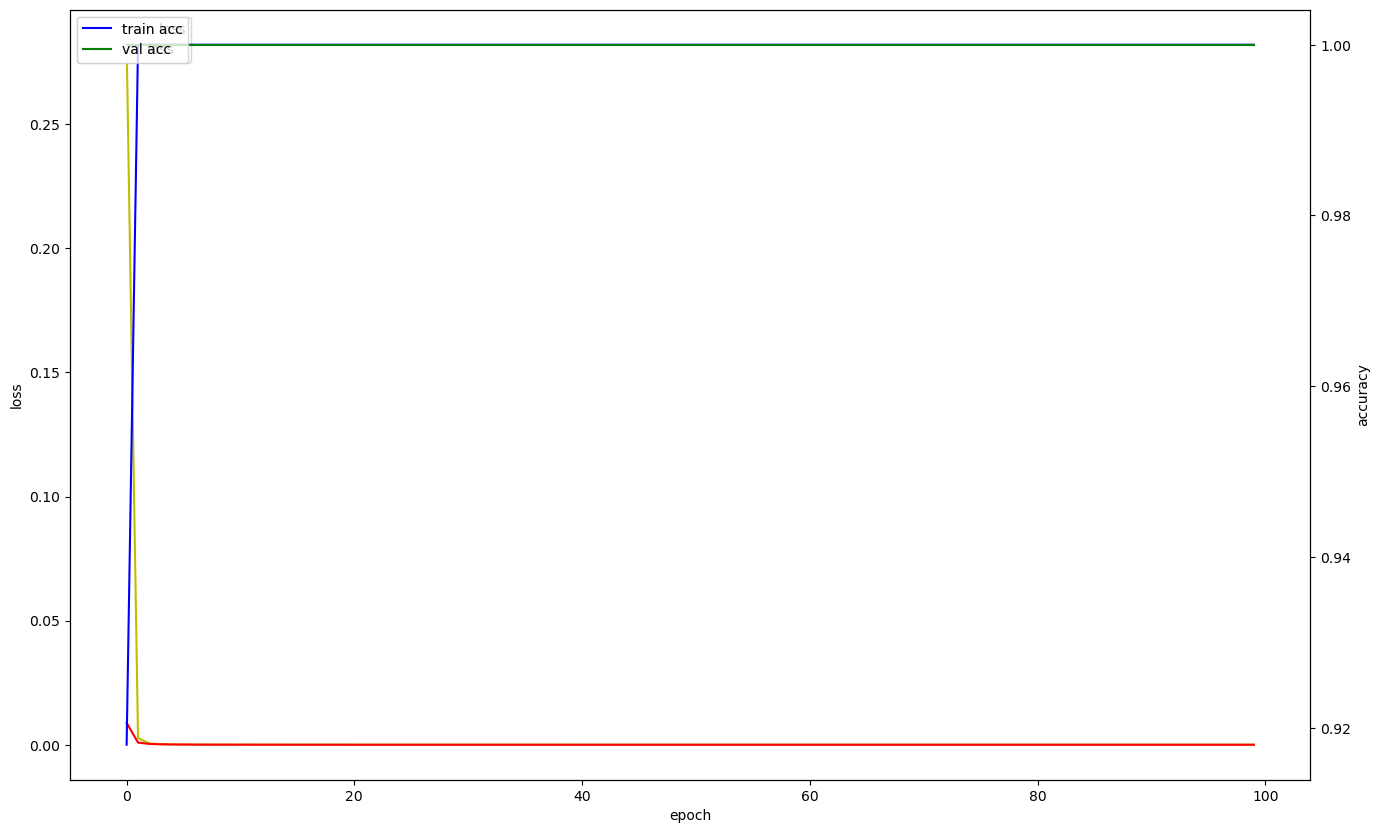

In [27]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots(figsize=(16, 10))
acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history.history['acc'], 'b', label='train acc')
acc_ax.plot(history.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.show()

In [28]:
from sklearn.metrics import multilabel_confusion_matrix
from tensorflow.keras.models import load_model

model1 = load_model('models/jm_model.keras')

y_pred = model.predict(x_val)

multilabel_confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


array([[[175,   0],
        [  0,  79]],

       [[166,   0],
        [  0,  88]],

       [[167,   0],
        [  0,  87]]])